In [1]:
import sys
import os
import numpy as np
import cv2
from plantcv import plantcv as pcv

In [2]:
# STEP 2: Set global variables
pcv.params.debug = 'plot'                                                           # Plot debug images to the notebook
rgb_img = './examples/shoot-images/VIS_SV_0_z2500_h2_g0_e82_180256.png'  # Image filename

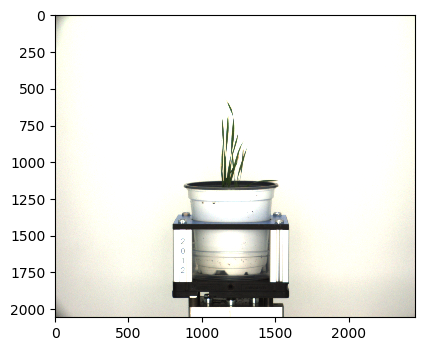

In [3]:
# STEP 3: Read RGB image and plot it to the notebook
# Inputs:
#    filename = name of image file
img, path, filename = pcv.readimage(rgb_img)                 

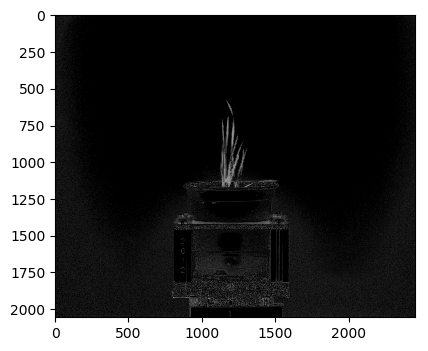

In [4]:
# STEP 4: Convert image from RGB colorspace to HSV colorspace
# Keep only the Saturation channel (grayscale)
# Inputs:
#    img     = image object, RGB colorspace
#    channel = color subchannel (h = hue, s = saturation, v = value/intensity/brightness)
img_gray_sat = pcv.rgb2gray_hsv(img, 's')

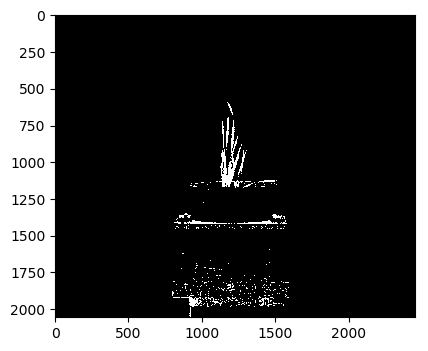

In [7]:
# STEP 5: Set a binary threshold on the Saturation channel image
# Inputs:
#    img         = img object, grayscale
#    threshold   = threshold value (0-255)
#    maxValue    = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#                  - If object is light then standard thresholding is done
#                  - If object is dark then inverse thresholding is done
img_binary = pcv.threshold.binary(img_gray_sat, 50, 255, 'light')
#                                                       ^
#                                                       |
#                                                       adjust this value

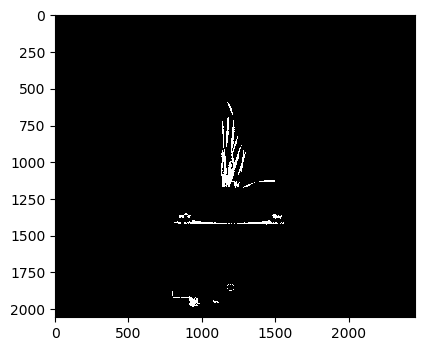

In [8]:
# STEP 6: Fill in small objects (speckles)
# Inputs:
#    img    = image object, grayscale. img will be returned after filling
#    size   = minimum object area size in pixels (integer)

fill_image = pcv.fill(img_binary, 300)
#                                  ^
#                                  |
#                               adjust this value

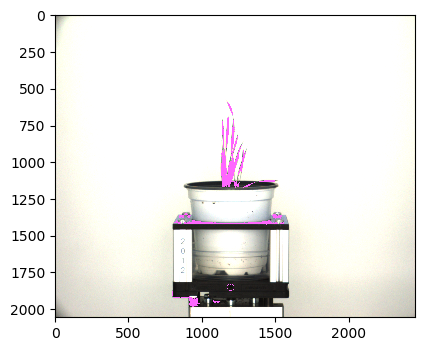

In [11]:
# STEP 8: Find objects (contours: black-white boundaries)
# Inputs:
#    img       = image that the objects will be overlayed
#    mask      = what is used for object detection
id_objects, obj_hierarchy = pcv.find_objects(img, fill_image)

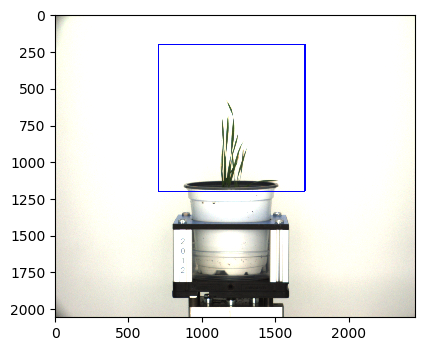

In [16]:
# STEP 9: Define region of interest (ROI)
# Inputs:
#    img       = img to overlay roi
#    x_adj     = adjust center along x axis
#    y_adj     = adjust center along y axis
#    w_adj     = adjust width
#    h_adj     = adjust height
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img, x=700, y=200, h=1000, w=1000)


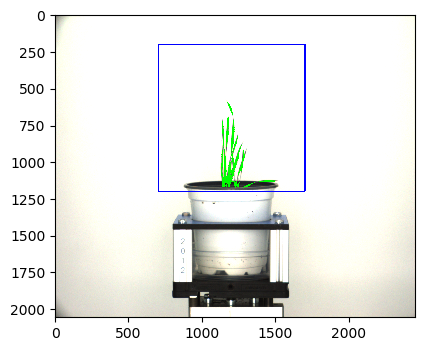

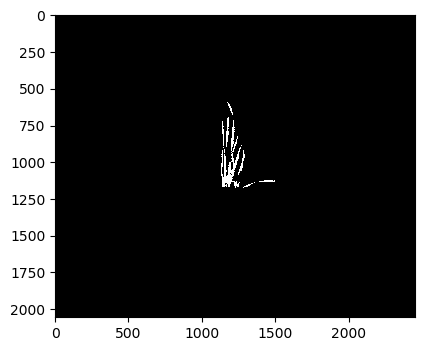

In [20]:
# STEP 10: Keep objects that overlap with the ROI
# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from "View and Ajust ROI" function
#    roi_hierarchy  = contour of roi, output from "View and Ajust ROI" function
#    object_contour = contours of objects, output from "Identifying Objects" fuction
#    obj_hierarchy  = hierarchy of objects, output from "Identifying Objects" fuction
#    roi_type       = 'cutto' or 'partial' (for partially inside)
roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img, roi_contour, roi_hierarchy,
                                                                           id_objects, obj_hierarchy,'partial')

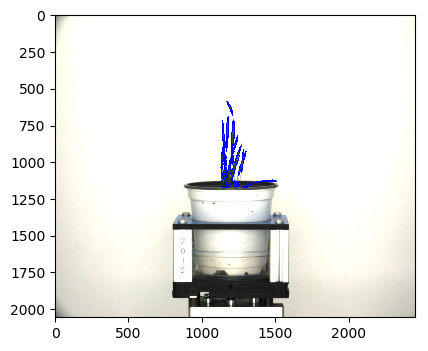

In [21]:
# STEP 11: Object combine kept objects
# Inputs:
#    img             = image object (most likely the original), color(RGB)
#    contours = object list
#    hierarchy  = hierarchy 
obj, mask = pcv.object_composition(img, roi_objects, roi_obj_hierarchy)

In [ ]:
######################## Analysis functions below #################################

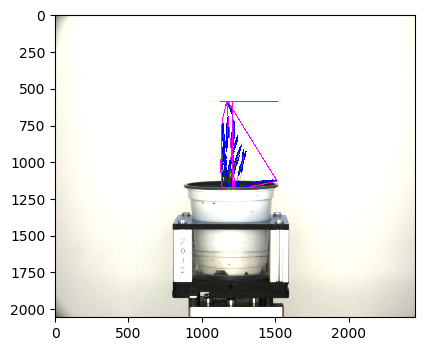

In [22]:
#STEP 13: Measure the area and other shape properties of the plant
# Inputs:
#    img             = image object (most likely the original), color(RGB)
#    obj             = single or grouped contour object
#    mask      = what is used for object detection

shape_image = pcv.analyze_object(img, obj, mask)

In [23]:
# Check out some of the measurements
plant_solidity = pcv.outputs.observations['solidity']['value']
plant_area = pcv.outputs.observations['area']['value']

print(plant_solidity)
print(plant_area)

0.2234617044359213
27704.0


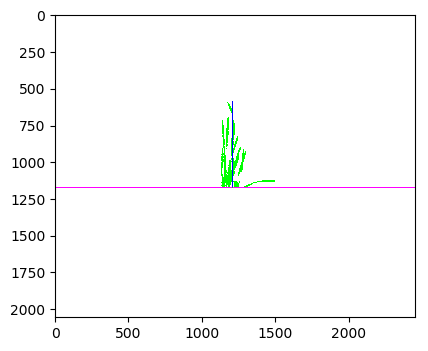

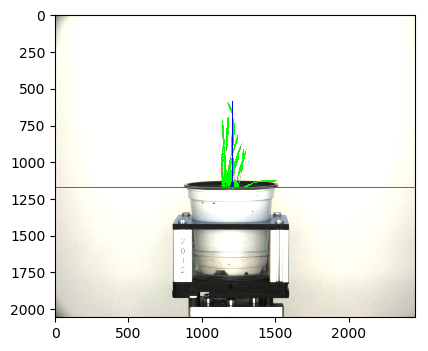

In [29]:
#STEP 14: Add a boundary line
#Inputs:
#    img             = image
#    obj             = single or grouped contour object
#    mask            = mask made from selected contours
#    line_position   = position of boundry line (a value of 0 would draw the line through the bottom of the image)

boundary_image = pcv.analyze_bound_horizontal(img, obj, mask, 1175)


In [31]:
area_below_reference = pcv.outputs.observations['area_below_reference']['value']
area_above_reference = pcv.outputs.observations['area_above_reference']['value']
percent_area_below_reference = pcv.outputs.observations['percent_area_below_reference']['value']
percent_area_above_reference = pcv.outputs.observations['percent_area_above_reference']['value']
print(area_above_reference)
print(area_below_reference)
print(percent_area_above_reference)
print(percent_area_below_reference)

27647
57
99.79425353739532
0.20574646260467802


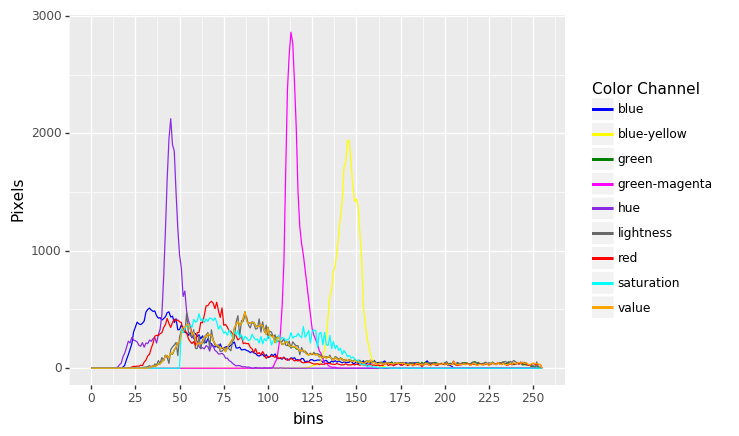

<ggplot: (8791693818828)>


In [32]:
#STEP 15: Analyze color
#Inputs:
#    img             = input image
#    mask            = binary mask image
#    channel         = color channel name

analysis_image = pcv.analyze_color(img, mask, 'all')

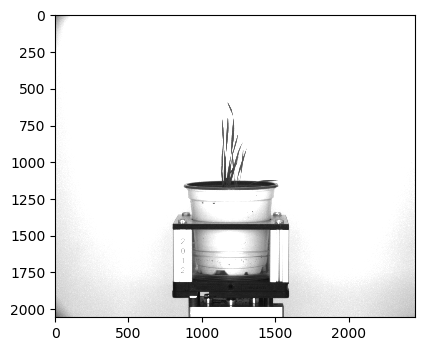

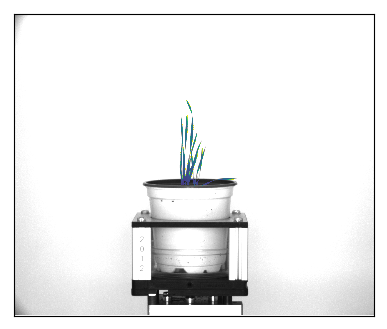

In [34]:
img_gray_val = pcv.rgb2gray_hsv(img, 'v')

simple_pseudo_img = pcv.visualize.pseudocolor(gray_img=img_gray_val, obj=None, mask=mask,
                                              background="image", axes=False,
                                              colorbar=False, cmap='viridis')

In [33]:
# Access data stored out from analyze_color
hue_circular_mean = pcv.outputs.observations['hue_circular_mean']['value']
print(hue_circular_mean)

92.71276350811722
